In [1]:
import cv2
import numpy as np
import gdal
from matplotlib import pyplot as plt

In [2]:
file = 'data/odm.tif'
fileout = 'dataout/odm.tif'

In [3]:
ds = gdal.Open(file)
imagen = cv2.imread(file)
hsv = cv2.cvtColor(imagen,cv2.COLOR_BGR2HSV)

In [4]:
arr = ds.ReadAsArray()

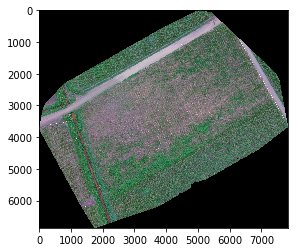

In [5]:
imagen.shape
plt.imshow(imagen)

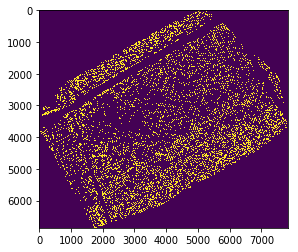

In [6]:
h0 = 33
h1 = 104
s0 = 41
s1 = 125
v0 = 118
v1 = 204

HSVbajo = np.array((h0,s0,v0))
HSValto = np.array((h1,s1,v1))

mask = cv2.inRange(hsv,HSVbajo,HSValto)
plt.imshow(mask)

In [7]:
band1 = ds.GetRasterBand(1)
band2 = ds.GetRasterBand(2)
band3 = ds.GetRasterBand(3)

arr_band1 = band1.ReadAsArray()
arr_band2 = band2.ReadAsArray()
arr_band3 = band3.ReadAsArray()

[cols, rows] = arr_band1.shape
#arr_min = arr.min()
#arr_max = arr.max()
#arr_mean = int(arr.mean())

In [8]:
#arr_out = np.where((arr < arr_mean), 10000, arr)

driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create(fileout, rows, cols, 1, gdal.GDT_UInt16)
outdata.SetGeoTransform(ds.GetGeoTransform())##sets same geotransform as input
outdata.SetProjection(ds.GetProjection())##sets same projection as input

outdata.GetRasterBand(1).WriteArray(mask)
outdata.GetRasterBand(1).SetNoDataValue(0)##if you want these values transparent transparent

outdata.FlushCache() ##saves to disk!!
outdata = None
band=None
ds=None